In [259]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import astropy.io.fits
import astropy.coordinates
import astropy.cosmology
import astropy.units as u

import json, gzip

files = [
    'BGS_BRIGHT-21.5_NGC_clustering.dat.fits',
    'BGS_BRIGHT-21.5_SGC_clustering.dat.fits',
    'LRG_NGC_clustering.dat.fits',
    'LRG_SGC_clustering.dat.fits',
    'ELG_LOPnotqso_NGC_clustering.dat.fits',
    'ELG_LOPnotqso_SGC_clustering.dat.fits',
    'QSO_NGC_clustering.dat.fits',
    'QSO_SGC_clustering.dat.fits',
]

tracers = [0,0,1,1,2,2,3,3]



In [261]:
xyz = []

radecz = []

for filename, tracer in zip(files, tracers):
    with astropy.io.fits.open(f'{filename}') as hdulist:
        data = hdulist[1].data

    coordinates = astropy.coordinates.SkyCoord(
        ra=data['RA']*u.degree,
        dec=data['DEC']*u.degree,
        distance=astropy.cosmology.Planck18.comoving_distance(data['Z'])*u.Mpc,
        frame='icrs'
    ).cartesian

    xyz.append(np.array([
        coordinates.x.value,
        coordinates.y.value,
        coordinates.z.value,
        np.ones(len(data))*tracer,
    ]))

    radecz.append(np.array([
        data['RA'],
        data['DEC'],
        data['Z'],
        np.ones(len(data))*tracer,
    ]))

xyz = np.concatenate(xyz, axis=1).T
radecz = np.concatenate(radecz, axis=1).T

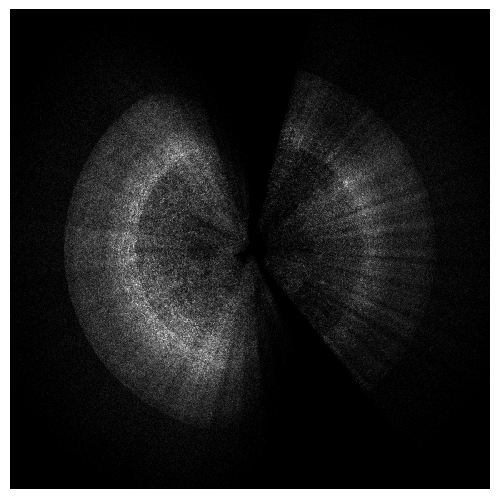

In [262]:
# xyz_rotated = xyz@sp.spatial.transform.Rotation.from_euler('y', 0, degrees=True).as_matrix()

color = 200,200,255
color = np.array(color)/255

cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'transparent_to_white', 
    [(*color, 0), (*color, 1)]
)

fig, ax = plt.subplots()

ax.hist2d(xyz_rotated[:,0], xyz_rotated[:,1], bins=1000, cmap='gray');
ax.set_aspect(1)

ax.set_axis_off()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
ax.set_ylim(-6000, 6000)
ax.set_xlim(-6000, 6000)

fig.patch.set_alpha(0.0)

# plt.savefig('xy_plane.png', bbox_inches='tight', pad_inches=0, dpi=150, transparent=True)


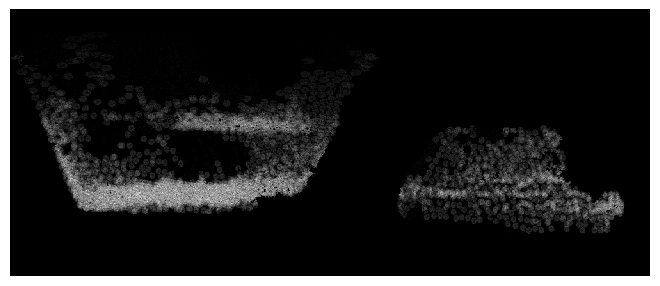

In [266]:
# xyz_rotated = xyz@sp.spatial.transform.Rotation.from_euler('y', 0, degrees=True).as_matrix()

color = 200,200,255
color = np.array(color)/255

cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'transparent_to_white', 
    [(*color, 0), (*color, 1)]
)

fig, ax = plt.subplots()

ax.hist2d((270+radecz[:,0])%360, radecz[:,1], bins=1000, cmap='gray', range=((0,360), (-40,90)));
ax.set_aspect(1/np.cos(np.deg2rad(30)))

ax.set_axis_off()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
# ax.set_xlim(0, 360)
# ax.set_ylim(-90, 90)


fig.patch.set_alpha(0.0)

# plt.savefig('rdz_plane.png', bbox_inches='tight', pad_inches=0, dpi=150, transparent=True)


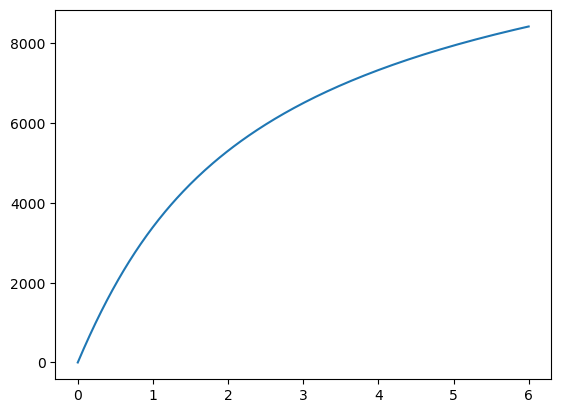

In [252]:
z = np.geomspace(1e-6, 6, 1000)
r = astropy.cosmology.Planck18.comoving_distance(z).value
plt.plot(z, r)

In [254]:
json_output = json.dumps(np.array([r,z]).T.tolist(), separators=(',', ':'))
with open('comoving_distances.json', 'w') as f:
    f.write(json_output)